In [2]:
#importar a biblioteca pandas
#aqui foi feito o upload das planilhas excel sendo que as mesmas não ficam salvas permanentemente.
import pandas as pd

In [4]:
#ler os arquivos excel
df1 = pd.read_excel('/content/Aracaju.xlsx')
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel('/content/Natal.xlsx')
df4 = pd.read_excel('/content/Recife.xlsx')
df5 = pd.read_excel('/content/Salvador.xlsx')

In [5]:
#concatenar planilhas excel
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
#exibir aleatoriamente 5 linhas armazenada na variável criada anteriormente.
df.sample(5)
#o método sample() aceita parâmetro, número inteiro.

,Cidade,Data,Vendas,LojaID,Qtde
113,Fortaleza,2019-03-02,38.63,980,2
12,Salvador,2019-01-01,125.05,1034,3
39,Fortaleza,2019-01-01,176.51,1005,1
193,Natal,2019-01-02,3.97,1036,2
63,Fortaleza,2019-01-01,118.17,1004,1


In [8]:
#para alterar o tipo do dado da coluna selecionada.
#Pode ser necessario em algum momento realizar a mudança do type do dado para
#melhor trabalhar. Foi alterado de int64 para strings(object).
df['LojaID'] = df['LojaID'].astype('object')
df.dtypes


Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [9]:
#retornar o type do dado para inteiro novamente.
df['LojaID'] = df['LojaID'].astype('int64')
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
#consultando linhas com faltantes ou nulos.
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [11]:
#valor médio de vendas.
df['Vendas'].mean()

122.61180089485458

In [12]:
#substituindo valores nulos pela média.
#o parametro inplance faz a mudança na memória.
df['Vendas'].fillna(df['Vendas'].mean(), inplace = True)

In [13]:
#vamos substituir os valores nulos por zero.
df['Vendas'].fillna(0,inplace=True)


In [14]:
#apagar os valores nulos.
df.dropna(inplace = True)

In [15]:
#remover linhas com valores nulos em todas as colunas.
df.dropna(how='all',inplace= True)

In [16]:
#criando nova coluna "Receita".
df["Receita"] = df["Vendas"].mul(df['Qtde'])

In [17]:
#exibindo 10 linhas aleatorias do dado com a nova coluna criada.
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
127,Salvador,2019-03-02,240.61,1035,3,721.83
100,Fortaleza,2019-01-01,18.58,1003,1,18.58
80,Aracaju,2018-01-01,121.77,1523,3,365.31
149,Natal,2019-01-02,22.38,1034,3,67.14
83,Recife,2019-01-01,143.61,983,6,861.66
39,Fortaleza,2019-01-01,176.51,1005,1,176.51
39,Natal,2019-01-10,504.00,854,3,1512.00
59,Fortaleza,2019-01-01,6.31,1002,3,18.93
3,Aracaju,2018-01-01,3.01,1521,7,21.07
100,Salvador,2019-01-01,190.97,1036,2,381.94


In [18]:
#busca da maior receita.
df['Receita'].max()

3544.0

In [19]:
#busca da menor receita.
df['Receita'].min()

3.34

In [20]:
#fazer uma busca das 3 lojas com maiores valor de venda ("Receita")
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [21]:
#fazer uma busca das 3 lojas com menores valor de venda ("Receita")
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [22]:
#pesquisa da quanto cada cidade vendeu nno total.
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [23]:
#Ordenando os dados da coluna "Receita" na ordem decrescente e exibir as 10 primeiras linhas.
df.sort_values("Receita",ascending = False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [24]:
#Ordenando os dados da coluna "Receita" na ordem crescente e exibir as 10 primeiras linhas.
df.sort_values("Receita",ascending= True).head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Salvador,2019-01-01,4.57,1035,1,4.57
92,Natal,2019-01-02,4.57,1035,1,4.57
95,Salvador,2019-01-01,5.13,1035,1,5.13


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#TRABALHANDO COM DATAS

In [26]:
# agora iniciará o trabalhar com datas.
#o typo do dado "Data" é datetime, mas vamos alterar para para inteiro.
#Posteriormente retornar para datetime para aprender com realizar essa alteração quando necessário.
df["Data"] = df["Data"].astype("int64")

In [27]:
#verificando que o dato foi alterado para inteiro.
df["Data"].dtypes

dtype('int64')

In [28]:
#retornando os dados da coluna Data para datetime.
df['Data'] = pd.to_datetime(df['Data'])

In [29]:
#verificando que o dato foi alterado para datetime.
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [30]:
#vamos retornar a receita total por ano.
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [31]:
#vamos criar uma nova coluna "Ano_Venda" que vai armazenar o ano da coluna "Data".
df["Ano_Venda"] = df["Data"].dt.year

In [32]:
#consultar as 5 primeiras linhas para verificar a nova coluna.
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [33]:
#aprimorando mais o recurso de criação de colunas, criando duas colunas Mês_Venda e Dia_Venda
df["Mês_Venda"],df["Dia_Venda"] = df["Data"].dt.month,df['Data'].dt.day

In [34]:
#verificando a criação das novas colunas no dado
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1


In [35]:
#consultado a data mais antiga.
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [36]:
#consultando a data mais recente.
df["Data"].max()

Timestamp('2019-04-05 00:00:00')

In [37]:
#calculando a diferença de dias entre duas datas e armazenando numa nova coluna.
df["diferença_dias"] = df["Data"] - df["Data"].min()

In [38]:
#verificando a nova coluna.
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,diferença_dias
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days


In [39]:
#criando a coluna trimestre.
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [40]:
#verificando a nova coluna.
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,diferença_dias,Trimestre_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1


In [41]:
#filtrando as vendas por ano e mês, exemplo: vendas de março de 2019.
#tambem cria uma variavel para armazenar o filtro.
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [42]:
#consultando a variavel criada anteriormente.
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,diferença_dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [ ]:
#VISUALIZAÇÃO DE DADOS

In [43]:
#consultando as vendas por loja em ordem decrescente.
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<Axes: >

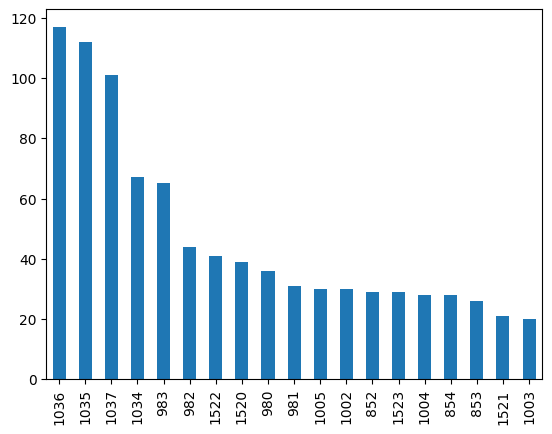

In [44]:
#gerar gráfico de barras verticais das vendas por loja em ordem decrescente.
df["LojaID"].value_counts(ascending = False).plot.bar()

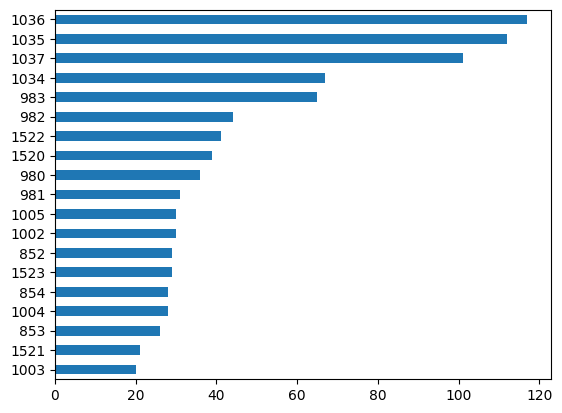

In [45]:
#agora vamos gerar o mesmo gráfico anterior com as barras na horizontal e em ordem crescente.
#ao usar ';' retiramos o log ao gerar o gráfico.
df["LojaID"].value_counts(ascending= True).plot.barh();

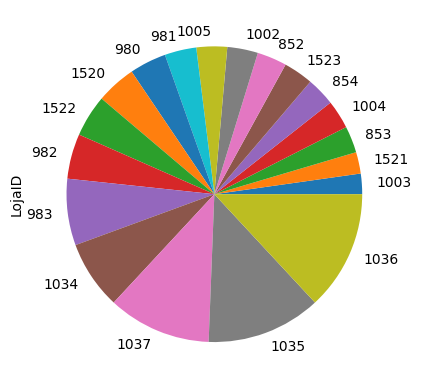

In [46]:
#gerar o grafico pizza com os mesmos dados anteriores.
df['LojaID'].value_counts(ascending=True).plot.pie();

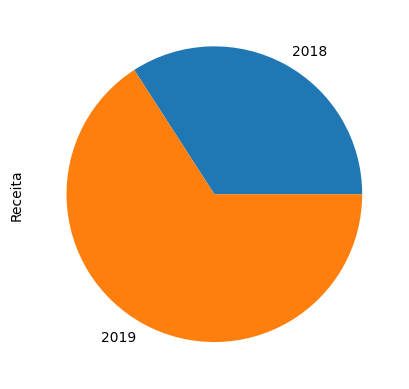

In [47]:
#agora vamos usar um gráfico em pizza com receita por ano.
df.groupby(df["Ano_Venda"])['Receita'].sum().plot.pie();

In [48]:
#consultar quantas vendas há por cidade.
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

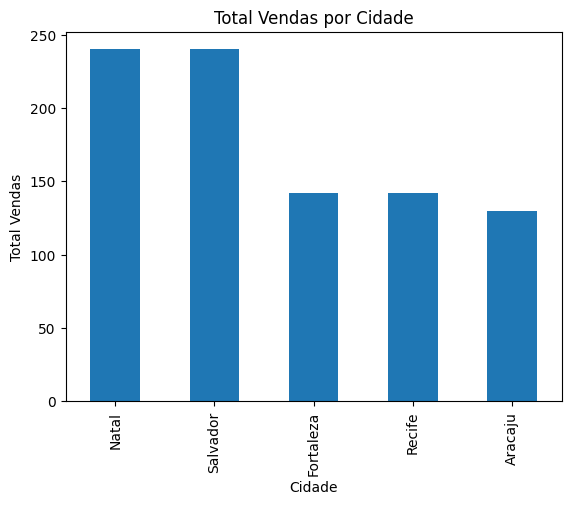

In [49]:
#adicionando titulo e nome para os eixos horizontais e vertical.
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title = "Total Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

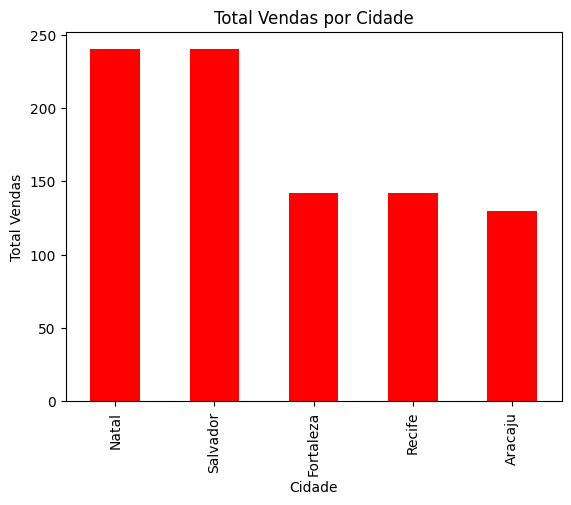

In [50]:
#alterando a cor das barras.
df["Cidade"].value_counts().plot.bar(title = "Total Vendas por Cidade",color='red')
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

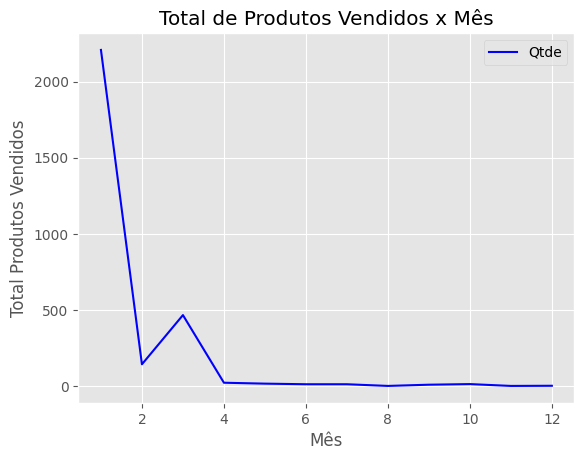

In [51]:
#alterando o estilo do gráfico. O gráfico de linhas será exibido.
plt.style.use("ggplot")
df.groupby(df['Mês_Venda'])['Qtde'].sum().plot(title="Total de Produtos Vendidos x Mês", color='blue')
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [52]:
#busca de produtos vendidos por mês.
df.groupby(df["Mês_Venda"])["Qtde"].sum()

Mês_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [53]:
#criando uma variavel para armazenar os dados do ano de 2019.
df_2019 = df[df["Ano_Venda"] == 2019]

In [54]:
#exibindo as vendas em 2019.
df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,diferença_dias,Trimestre_Venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1


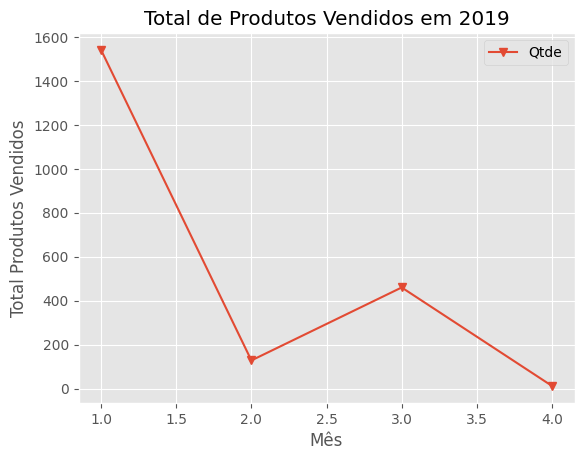

In [55]:
#gerar gráfico do Total de Produtos Vendidos por mês em 2019.
df_2019.groupby(df_2019["Mês_Venda"])['Qtde'].sum().plot(marker='v',title = "Total de Produtos Vendidos em 2019")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

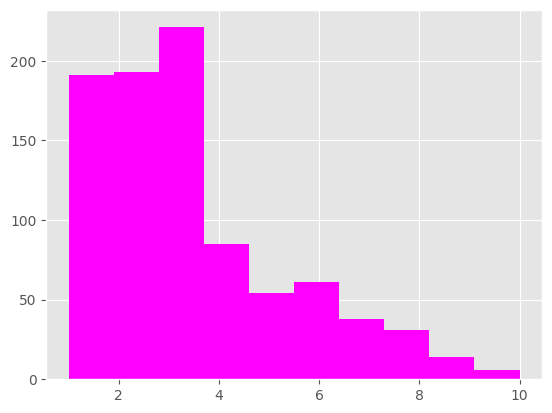

In [56]:
#gerar um histograma.
plt.hist(df['Qtde'], color = 'magenta');

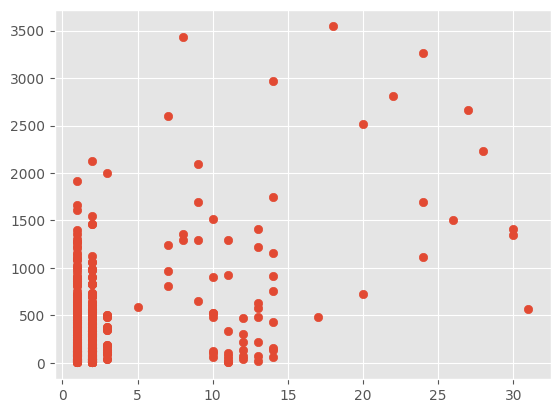

In [57]:
#gerar gráfico de dispersão
plt.scatter(x=df_2019['Dia_Venda'],y=df_2019['Receita']);

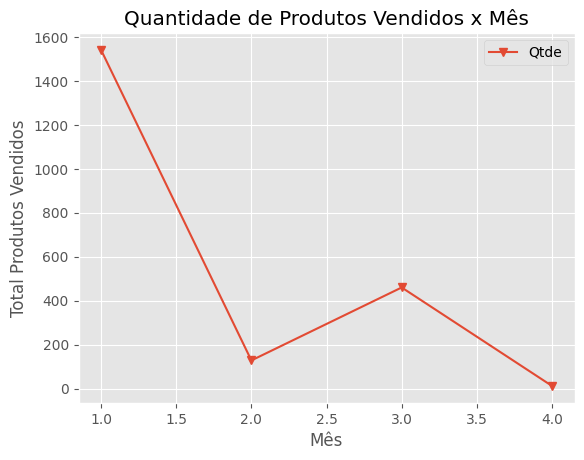

In [59]:
#agora vamos gera um grafico e salva-lo como uma imagem png.
df_2019.groupby(df_2019["Mês_Venda"])['Qtde'].sum().plot(marker='v')
plt.title("Quantidade de Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();
plt.savefig("gráfico Qtde x Mês.png")